In [1]:
# Bloco de imports

import keras
from keras.datasets import mnist # Base de dados MNIST (http://yann.lecun.com/exdb/mnist/)
from tensorflow.python.keras import Sequential # Modelo da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation - que é como a rede a aprende)

In [2]:
# Carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
print("Quantidade de imagens para treino:", len(x_treino)) # 60000

print("Quantidade de imagens para teste:", len(x_teste)) # 10000

print("Tipo de x_treino:", type(x_treino)) # <class 'numpy.ndarray'>

representacao_primeira_imagem = y_treino[0]
print("O que a imagem x_treino[0] representa:", representacao_primeira_imagem)

primeira_imagem = x_treino[0]

formato_primeira_imagem = primeira_imagem.shape
print("Formato da primeira imagem:", formato_primeira_imagem, type(formato_primeira_imagem))

print("Primeira imagem:", primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem x_treino[0] representa: 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
Primeira imagem: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 25

Essa imagem representa: 5


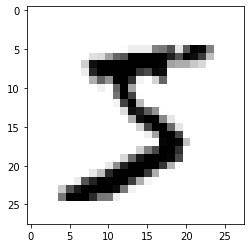

In [4]:
import matplotlib.pyplot as plt

"""
for indice in range(60000):
  print("Essa imagem representa:", y_treino[indice])
  plt.imshow(x_treino[indice], cmap=plt.cm.binary)
  plt.show()
"""

indice = 0

print("Essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [5]:
# Fluxo para construção da rede neural
# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões

In [6]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [7]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [8]:
# Normalização dos dados

# 255 vira 1
# 127 vira 0.5
# 0 vira 0
# E assim por diante

# Precisamos garantir que o valor de entrada da rede neural é 1
# Como a imagem atual fornece um valor máximo de 255, precisamos normalizá-los

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))

0.27450982 <class 'numpy.float32'>


In [9]:
# Visualizando dados normalizados

print("Dados normalizados:", x_treino[0])

Dados normalizados: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [13]:
# Preparação da camada de saída (output)

valores_unicos = set(y_treino) # {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
print("Valores únicos:", valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10
print("Quantidade de valores únicos:", quantidade_valores_unicos)

# Transformar os valores únicos em variáveis categóricas
# Número 0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Número 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ...
# Número 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print("y_treino[0] antes:", y_treino[0]) # 5

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0]) # [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

Valores únicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Quantidade de valores únicos: 10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
# Criando o modelo da rede neural

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting
# No caso, será o Dropout

model.add(Dropout(0.2))

# Segunda hidden layer
# 20 neurônios
# Função de ativação: ReLU
model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos, que no caso é 10

model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compila o modelo

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [18]:
# Treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8818 - accuracy: 0.7165 - val_loss: 0.3154 - val_accuracy: 0.9102
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4596 - accuracy: 0.8636 - val_loss: 0.2449 - val_accuracy: 0.9294
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8856 - val_loss: 0.2276 - val_accuracy: 0.9351
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3484 - accuracy: 0.8985 - val_loss: 0.2038 - val_accuracy: 0.9426
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3257 - accuracy: 0.9056 - val_loss: 0.1926 - val_accuracy: 0.9454
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3092 - accuracy: 0.9102 - val_loss: 0.1836 - val_accuracy: 0.9478
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.9144 - val_loss: 0.1799 - val_accuracy: 0.9487
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Previsão: [[6.1875437e-07 1.2946898e-05 5.1232111e-03 9.9388617e-01 1.1637442e-09
  3.0607657e-04 7.0184365e-09 1.1402199e-06 6.6968770e-04 1.2654799e-07]]
Previsão ajustada: [3]


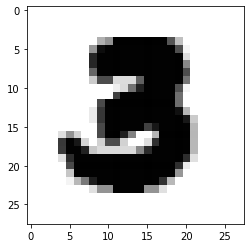

In [25]:
# Fazendo nossas previsões

indice = 200

print("Valor categórico em y_teste[indice]:", y_teste[indice])

# Preparar a imagem para fazer a previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

previsao = model.predict(imagem)
print("Previsão:", previsao)

import numpy as np
previsao_categorica = np.argmax(previsao, axis=-1)
print("Previsão ajustada:", previsao_categorica)

# Apenas para demonstração visual, não precisa por em um código em produção:
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
plt.show()

In [29]:
while True:
  # Fazendo nossas previsões

  indice = int(input("Índice:"))

  print("Valor categórico em y_teste[indice]:", y_teste[indice])

  # Preparar a imagem para fazer a previsão
  imagem = x_teste[indice].reshape((1, resolucao_total))

  previsao = model.predict(imagem)
  print("Previsão:", previsao)

  import numpy as np
  previsao_categorica = np.argmax(previsao, axis=-1)
  print("Previsão ajustada:", previsao_categorica)

  # Apenas para demonstração visual, não precisa por em um código em produção:
  (x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
  plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
  plt.show()

KeyboardInterrupt: ignored

Rede neural FALHOU!
Índice: 63; Valor original: 3; Previsão: 2;
[[3.7654249e-06 3.1300508e-03 6.2033224e-01 3.7591031e-01 2.2908206e-07
  8.5983767e-05 3.0890649e-06 1.0098036e-04 4.3233973e-04 1.0719074e-06]]


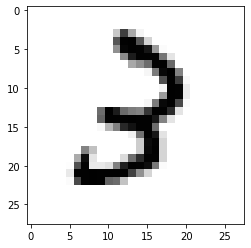

Rede neural FALHOU!
Índice: 111; Valor original: 7; Previsão: 1;
[[5.5805799e-06 7.2003692e-01 2.2597054e-02 1.5917517e-02 2.1809340e-07
  5.3470387e-07 7.6716006e-08 2.3845869e-01 2.9209799e-03 6.2425461e-05]]


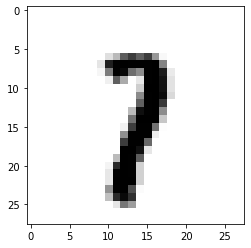

Rede neural FALHOU!
Índice: 149; Valor original: 2; Previsão: 8;
[[0.00147251 0.14677453 0.08426476 0.03036651 0.22045708 0.00379151
  0.02097452 0.01229148 0.33023366 0.14937344]]


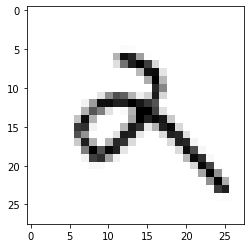

Rede neural FALHOU!
Índice: 151; Valor original: 9; Previsão: 8;
[[1.6975711e-04 2.0369603e-03 3.7193627e-03 1.3194060e-02 6.3617108e-03
  1.3893280e-02 1.2414013e-04 1.4826793e-03 9.2416817e-01 3.4849845e-02]]


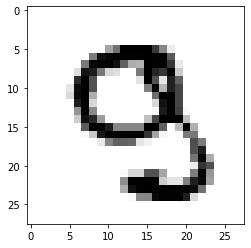

In [37]:
# Fazendo nossas previsões

(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()

for indice in range(30, 200):
  # print(f"Valor categórico em y_teste[{indice}]:", y_teste[indice])

  # Preparar a imagem para fazer a previsão
  imagem = x_teste[indice].reshape((1, resolucao_total))

  previsao = model.predict(imagem)
  # print("Previsão:", previsao)

  import numpy as np
  previsao_categorica = np.argmax(previsao, axis=-1)[0]
  # print("Previsão ajustada:", previsao_categorica)

  valor_original = y_teste_img[indice]

  if valor_original != previsao_categorica:
    print("Rede neural FALHOU!")
    print(f"Índice: {indice}; Valor original: {valor_original}; Previsão: {previsao_categorica};\n{previsao}")
    plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
    plt.show()

  # Apenas para demonstração visual, não precisa por em um código em produção:
  # plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
  # plt.show()